# Práctica 5: Boosting

Inteligencia de Datos

Universidad Iberoamericana Ciudad de México

Creado por: Luis Norberto Zúñiga Morales, inspirado en el libro *Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow*.

Boosting es un método de Ensemble Learning que combina modelos débiles para convertirlos en uno fuerte. La idea general de estos métodos es entrenar secuencialmente los predictores, donde cada uno intentar corregir a su predecesor y mejorar los resultados en general. A lo largo de los años han surgido diversos modelos basados en esta idea, entre ellos AdaBoost y Gradient Boosting. Vamos a explorar ambas ideas.

## AdaBoost

Si recuerdan de la clase, la idea de AdaBoost es que cada nuevo predicto del ensamble se fija en los errores de su predecesor y se enfoca más en las instancias que este no logro predecir correctamente al incrementar sus pesos relativos.

Scikit-Learn utiliza una versión multiclase de AdaBoost llamada SAMME (*Stagewise Additive Modeling using a Multiclass Exponential loss function*). Cuando se trabaja con dos clases, SAMME es igual a AdaBoost. Si los modelos base pueden estimar probabilidades de clase, Scikit-Learn usar una variante de SAMME llamada SAMME.R (*Real*), que suele dar mejores resultados.

El siguiente código entrena un clasificador AdaBoost basado en 200 tocones mediante la clase `AdaBoostClassifier`. Un tocón es un Árbol de Decisión con `max_deepth = 1`. Este modelo base es el que se usa por default en muchos modelos de ensambles, incluido `AdaBoostClassifier`. Para los datos, seguiremos usando el mismo que usamos en la práctica anterior de Bagging.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

**Actividad**: Revisar la documentación de `AdaBoostClassifier` en Scikit-Learn y realizar un pequeño resumen de los primeros cinco parámetros de la clase.

*Su respuesta en esta celda*

Vamos a visualizar el margen de decisión que crea este modelo de clasificación con nuestros datos:

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

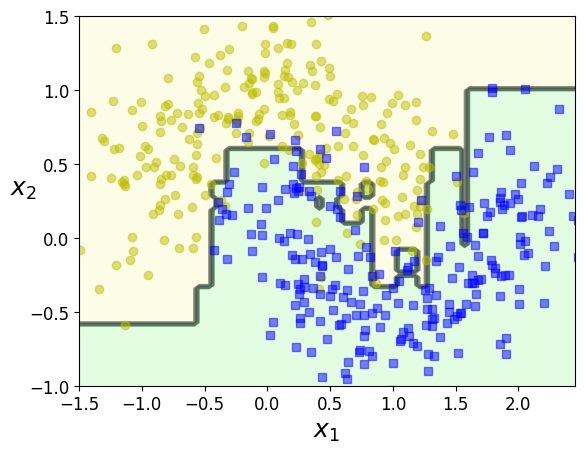

In [ ]:
plot_decision_boundary(ada_clf, X, y)

La siguiente figura muesta los márgenes de decisión de cinco predictores consecutivos:

[0.00266667 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667
 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667
 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667
 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667
 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667
 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667
 0.00266667 0.00266667 0.00266667 0.00266667 0.00266667]
0.10933333333333332
[0.00149701 0.00149701 0.00149701 0.00149701 0.00149701 0.00149701
 0.01219512 0.00149701 0.00149701 0.00149701 0.00149701 0.00149701
 0.00149701 0.00149701 0.00149701 0.00149701 0.00149701 0.00149701
 0.00149701 0.00149701 0.00149701 0.00149701 0.00149701 0.00149701
 0.00149701 0.00149701 0.00149701 0.00149701 0.00149701 0.00149701
 0.00149701 0.00149701 0.00149701 0.00149701 0.00149701 0.00149701
 0.00149701 0.01219512 0.00149701 0.00149701 0.00149701 0.00149701
 0.00149701 0.00149701 0.00149701 0.00149701 0.00149

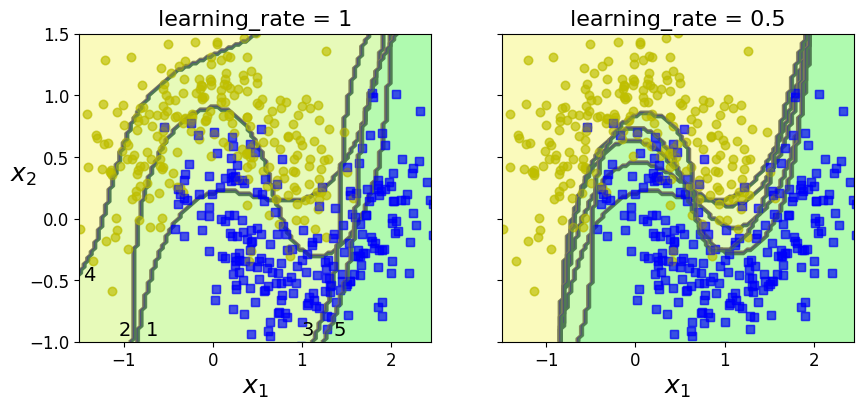

In [9]:
from sklearn.svm import SVC

m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        print(sample_weights[y_pred != y_train])
        print(sample_weights[y_pred != y_train].sum())
        r = sample_weights[y_pred != y_train].sum() / sample_weights.sum() # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r) # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha) # equation 7-3
        sample_weights /= sample_weights.sum() # normalization step
        print(sample_weights)

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

**Actividad**: ¿Qué pueden concluir de la imagen anterior?

*Su respuesta en esta celda*

## Gradient Boosting

Otro algoritmo de Boosting popular es Gradient Boosting. Al igual que AdaBoost, Gradient Boosting añade predictores al ensamble de forma secuencial, cada uno corrigiendo al anterior. Sin embargo, en lugar de ajustar los pesos de las instancias en cada iteración como AdaBosst, este método intenta ajustar el nuevo predictor a los errores residuales hechos por el predictor anterior. Para empezar, vamos a implementar un ejemplo de regresión con Árboles de Decisión con un conjunto de datos artificial:

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

Entrenamos el regresor con los datos anteriores:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Después, entrenamos un segundo `DecisionTreeRegressor` con los errores residuales hechos por el primer modelo:

In [ ]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

Después, entrenamos un tercer regresor con los errores residuales hechos por el segundo modelo:

In [ ]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

Ahora tenemos un ensamble con tres árboles, el cual puede realizar predicciones en un anueva instancia simplemente sumando las predicciones de los tres modelos:

In [ ]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

Ahora vamos a visualizar las predicciones de estos tres árboles (izquierda) contra las predicciones del ensamble (derecha):

In [ ]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

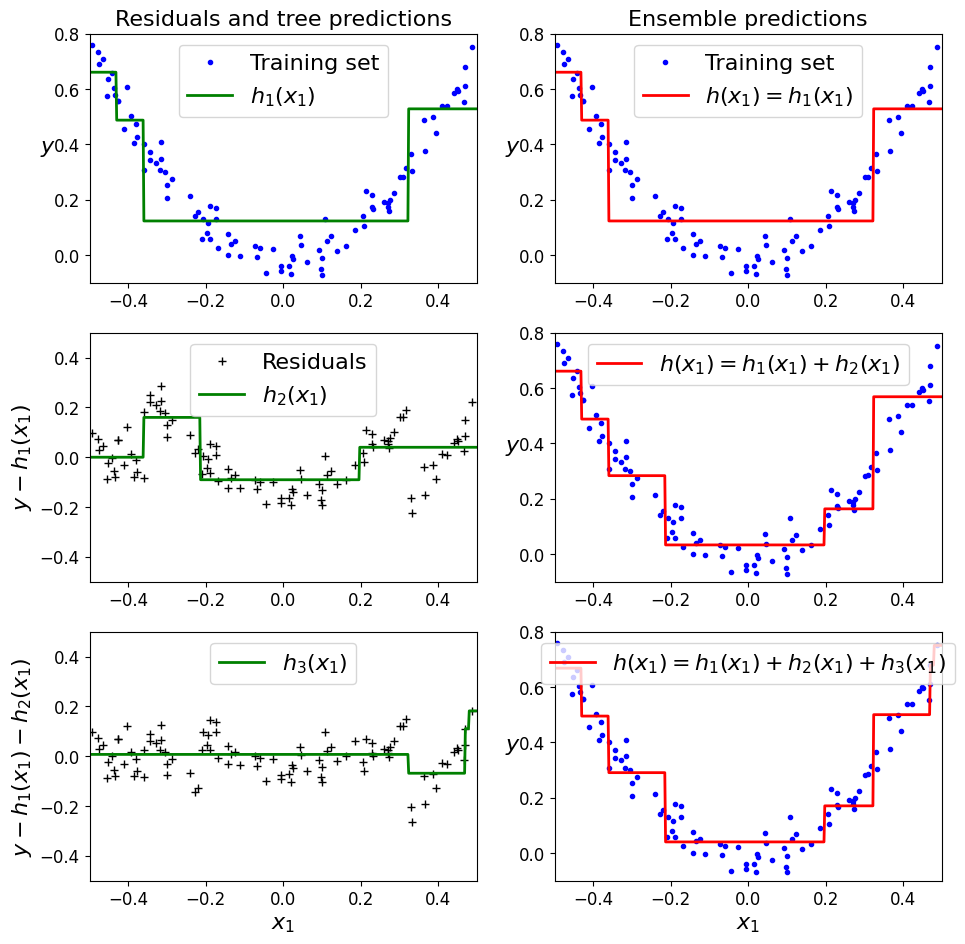

In [ ]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

**Actividad**: ¿Qué pueden observar en las imágenes anteriores?

*Su respuesta en esta celda*

Ya que implementamos la idea básica de GradientBoosting, vamos a usar Scikit-Learn para implementar la clase `GradientBoostingRegressor`.

**Actividad**: ¿Qué controlan los primeros nueve parámetros de la clase `GradientBoostingRegressor`?

*Su respuesta en esta celda*

Vamos a crear el ensamble con el siguiente código:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

El hiperparámetro `learning_rate` escala la contribución de cada árbol. Si es un valor pequeño, como 0.1, se necesitarán más árboles en el ensamble para aprender del conjunto de entrenamiento, pero las predicciones suelen generalizar mejor. Esta es una técnica de regularización llamada `shrinkage`. Vamos a comparar el efecto de este hiperparámetro en la siguiente gráfica:

In [ ]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

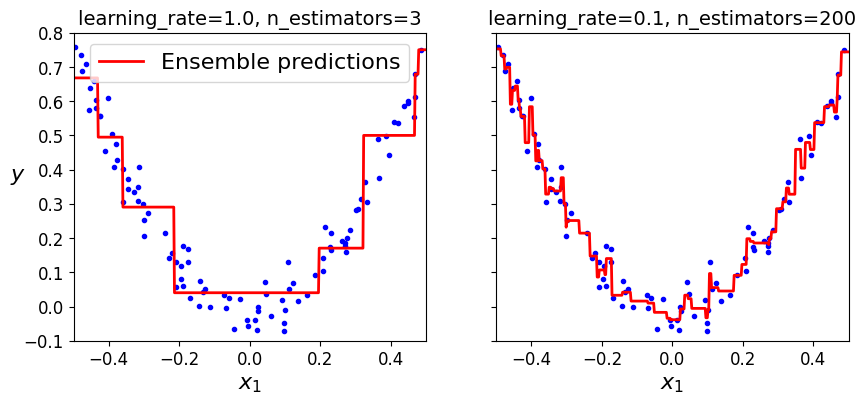

In [ ]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

**Actividad**: ¿Qué pueden concluir de la imagen anterior?

*Su respuesta en esta celda*

Para encontrar el número óptimo de árboles (modelos base), se puede usar early stopping. Una manera simple de hacerlo es usando el método `staged_predict()`, el cual regresa un iterador sobre todas las predicciones hechas popr el ensamble en cada fase de su entrenamiento (con uno, dos, tres árboles, etc.). El siguiente código entrena un modelo de Gradient Boosting para regresión con 120 árboles, luego mide el error de validación en cada fase del entrenamiento para determinar el valor óptimo de árboles y, finalmente, entrena otro modelo regresor con dicho número:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

La siguiente figura muestra los errores de validación en la izquierda, y las predicciones del mejor modelo en la derecha:

In [ ]:
min_error = np.min(errors)

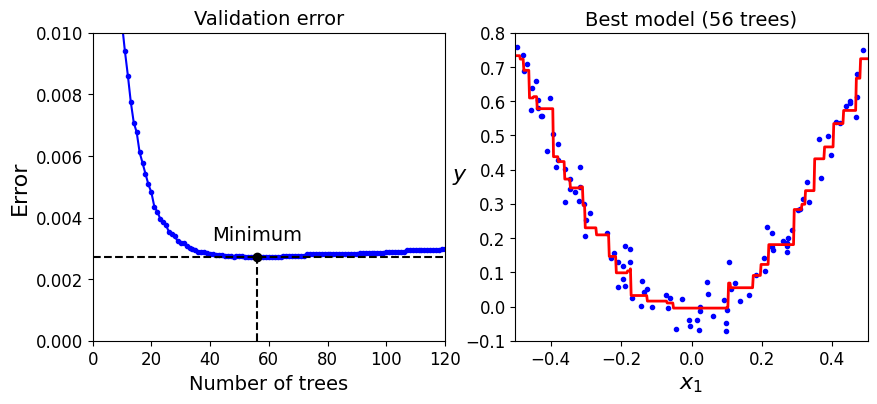

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

Finalmente, `GradientBoostingRegressor` permite ajustar un hiperparámetro llamado `subsample`, que especifica la fracción de instancias del conjunto de entrenamiento que se usan para entrenar cada árbol. Por ejemplo, si `subsample=0.25`, cada árbol se entrena con un 25% de las instancias del conjunto de entrenamiento, al azar. Similar a Gradiente Descendiente Estocástico, está técnica se llama Stochastic Gradient Boosting. Usar esto implica aumentar el sesgo para disminuir varianza.

## Ejercicios

Existe una versión optimizada de Gradient Boosting llamada XGBoost, o Extreme Gradient Boosting. Este modelo es un componente importante del Machine Learning actual y ha permitido resolver diversos problemas en la actualidad. Aunque no se encuentra disponible en Scikit-Learn, su API se parece a esta.

1. Investigar la API de XGBoost y familiarizarse con ella.
2. Implementar un modelo de regresión con XGBoost para entrenar un modelo con los datos que se usaron en la sección de Gradient Boosting. Utilicen la técnica de early stopping que facilita XGBoost.
3. Comparar resultados (MSE) con el modelo entrenado en la práctica y el de este ejercicio.